- Exercici 1
Agafa un conjunt de dades de tema esportiu que t'agradi i selecciona un atribut del conjunt de dades. Calcula el p-valor i digues si rebutja la hipòtesi nul·la agafant un alfa de 5%. 

Dataset: https://www.kaggle.com/rishikeshkanabar/premier-league-player-statistics-updated-daily

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
from statsmodels.graphics.gofplots import qqplot
import matplotlib.pyplot as plt

In [2]:
premier_df = pd.read_csv('C:\\Users\\elgab\\Desktop\\NUBE MEGA\\PROGRAMACIÓN\\2020-2021\\IT_Academy\\itinerario DS\\bases_datos\\premier_league.csv', sep=',')
#premier_df = pd.read_csv('C:\\Users\\formacio\\Gabriel De Santis\\Datasets\\premier_league.csv', sep=',')
premier_df.head()

,Name,Jersey Number,Club,Position,Nationality,Age,Appearances,Wins,Losses,Goals,...,Punches,High Claims,Catches,Sweeper clearances,Throw outs,Goal Kicks,Yellow cards,Red cards,Fouls,Offsides
0,Bernd Leno,1.0,Arsenal,Goalkeeper,Germany,28.0,64,28,16,0,...,34.0,26.0,17.0,28.0,375.0,489.0,2,0,0,NaN
1,Matt Macey,33.0,Arsenal,Goalkeeper,England,26.0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,NaN
2,Rúnar Alex Rúnarsson,13.0,Arsenal,Goalkeeper,Iceland,25.0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,NaN
3,Héctor Bellerín,2.0,Arsenal,Defender,Spain,25.0,160,90,37,7,...,NaN,NaN,NaN,NaN,NaN,NaN,23,0,125,8.0
4,Kieran Tierney,3.0,Arsenal,Defender,Scotland,23.0,16,7,5,1,...,NaN,NaN,NaN,NaN,NaN,NaN,2,0,9,0.0


In [3]:
premier_df.columns

Index(['Name', 'Jersey Number', 'Club', 'Position', 'Nationality', 'Age',
       'Appearances', 'Wins', 'Losses', 'Goals', 'Goals per match',
       'Headed goals', 'Goals with right foot', 'Goals with left foot',
       'Penalties scored', 'Freekicks scored', 'Shots', 'Shots on target',
       'Shooting accuracy %', 'Hit woodwork', 'Big chances missed',
       'Clean sheets', 'Goals conceded', 'Tackles', 'Tackle success %',
       'Last man tackles', 'Blocked shots', 'Interceptions', 'Clearances',
       'Headed Clearance', 'Clearances off line', 'Recoveries', 'Duels won',
       'Duels lost', 'Successful 50/50s', 'Aerial battles won',
       'Aerial battles lost', 'Own goals', 'Errors leading to goal', 'Assists',
       'Passes', 'Passes per match', 'Big chances created', 'Crosses',
       'Cross accuracy %', 'Through balls', 'Accurate long balls', 'Saves',
       'Penalties saved', 'Punches', 'High Claims', 'Catches',
       'Sweeper clearances', 'Throw outs', 'Goal Kicks', 'Yellow 

Hem escollit la variable 'Age' per fer un test Shapiro-Wilk amb l'objectiu de comprovar si segueix una distribució normal

In [4]:
premier_df.Age.isna().sum()

1

In [5]:
premier_df[premier_df.Age.isna()]

,Name,Jersey Number,Club,Position,Nationality,Age,Appearances,Wins,Losses,Goals,...,Punches,High Claims,Catches,Sweeper clearances,Throw outs,Goal Kicks,Yellow cards,Red cards,Fouls,Offsides
241,Ezgjan Alioski,10.0,Leeds-United,Midfielder,NaN,NaN,1,1,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,0,0,1,0.0


In [6]:
premier_df.Age = premier_df.Age.fillna(round(premier_df.Age.mean()))

In [7]:
premier_df.Age.isna().sum()

0

<AxesSubplot:xlabel='Age', ylabel='Count'>

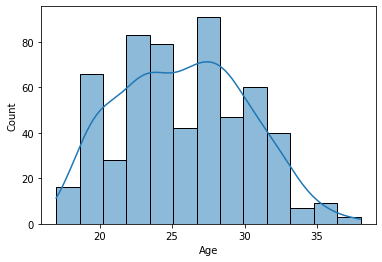

In [8]:
sns.histplot(premier_df.Age, kde=True)

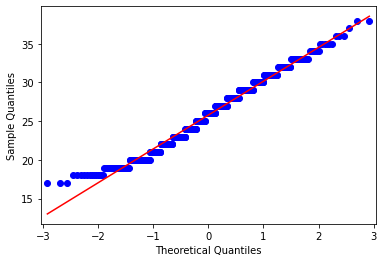

In [9]:
qqplot(premier_df.Age, line='s')
plt.show()

In [10]:
stat, p = stats.shapiro(premier_df.Age)
print('Statistics=%.3f, p=%.10f' % (stat, p))

Statistics=0.981, p=0.0000007354


El p-value es menor que alpha=0.05, per tant rebutjem la hipòtesi nul·la, és a dir, que la probabilitat apunta a que no es tracta d'una distribució normal. Aquesta conclusió es veu reforçada també pel qqplot, que ens mostra com la distribució dels valors s'allunyen d'una normal (representada per la línia vermella).

---

- Exercici 2
Continua amb el conjunt de dades de tema esportiu que t'agradi i selecciona dos altres atributs del conjunt de dades. Calcula els p-valors i digues si rebutgen la hipòtesi nul·la agafant un alfa de 5%.

Per a aquest exercici hem fet dos tests: un per a variables categòriques i l'altre per variables numèriques respectivament.

En primer lloc, farem un Chi-Test per comprovar si existeix cap tipus de dependència entre 'Jersey Number' i 'Position'.

In [11]:
print(premier_df['Jersey Number'].isnull().sum())
print(premier_df['Jersey Number'].count())

8
563


Completarem els null values amb backfill. Per a fer això, ordenarem el dataset segons la posició dels jugadors de manera que, per exemple, un null value d'un porter no s'ompli amb el número de samarreta d'un davanter.

In [12]:
premier_copy = premier_df.sort_values(by='Position').copy(deep=True)

In [13]:
premier_copy['Jersey Number'] = premier_copy['Jersey Number'].fillna(method='bfill')
premier_copy['Jersey Number'].isna().sum()

0

In [14]:
premier_copy['Jersey Number'] = premier_copy['Jersey Number'].astype('int64').astype('string').astype('category')

In [15]:
premier_copy.Position = premier_copy.Position.astype('category')

In [16]:
table = pd.crosstab(premier_copy.Position, premier_copy['Jersey Number'])
table

Jersey Number,1,10,11,12,13,14,15,16,17,18,...,67,69,7,71,72,73,76,8,82,9
Position,,,,,,,,,,,,,,,,,,,,,
Defender,0,0,1,5,3,3,4,4,1,5,...,0,0,0,1,1,0,1,0,0,0
Forward,0,8,9,3,2,5,1,1,6,2,...,0,0,10,0,0,0,0,0,0,19
Goalkeeper,16,0,1,4,5,0,1,0,0,1,...,0,0,0,0,0,2,0,0,0,0
Midfielder,0,12,8,3,2,6,7,7,8,8,...,1,1,9,0,0,0,0,19,1,0


In [17]:
stat, p, dof, expected = stats.chi2_contingency(table)

In [18]:
print(f'P-valor: {p:.6f}')

P-valor: 0.000000


In [19]:
prob = 0.95
alpha = 1.0 - prob

if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')

Dependent (reject H0)


Com podem observar, el p-value és menor que alpha, per tant, rebutjem la hipòtesi nul·la, és a dir, les variables 'Jersey Number' i 'Position' son probablement dependents.  

---

En segon lloc, realitzarem un test de correlació Spearman per a dues variables numèriques.

En primer lloc, generarem noves col·lumnes per poder fer el test. Ja que si fem un test de correlació sobre, per exemple, 'Passes' i 'Wins', ens sortirà esbiaixat, donat que son variables que contenen valors acumulatius al llarg de la carrera del futbolista (aleshores intervé un altre factor que és com de llarga ha sigut la carrera de cada futbolista). Per evitar això, crearem columnes que consisteixen en un índex per partir, per exemple: índex de victòries per partit = total victòries / total 'aparicions'. D'aquesta forma, considerarem només als jugadors que han "aparegut" en més de 10 partits.

In [20]:
null = premier_df.isna().sum() / len(premier_df) *100
not_null = list(null[null == 0].index)
not_null

['Name',
 'Club',
 'Position',
 'Age',
 'Appearances',
 'Wins',
 'Losses',
 'Goals',
 'Assists',
 'Passes',
 'Passes per match',
 'Yellow cards',
 'Red cards',
 'Fouls']

Només jugadors que hagin participat a almenys 10 partits.

In [21]:
premier = premier_df[not_null].copy(deep=True)
premier = premier[premier.Appearances > 10]
premier

,Name,Club,Position,Age,Appearances,Wins,Losses,Goals,Assists,Passes,Passes per match,Yellow cards,Red cards,Fouls
0,Bernd Leno,Arsenal,Goalkeeper,28.0,64,28,16,0,0,1783,27.86,2,0,0
3,Héctor Bellerín,Arsenal,Defender,25.0,160,90,37,7,18,7125,44.53,23,0,125
4,Kieran Tierney,Arsenal,Defender,23.0,16,7,5,1,1,519,32.44,2,0,9
6,Sokratis,Arsenal,Defender,32.0,44,21,11,3,2,2416,54.91,18,0,56
7,Rob Holding,Arsenal,Defender,25.0,41,25,9,0,0,2200,53.66,8,0,32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
562,João Moutinho,Wolverhampton-Wanderers,Midfielder,34.0,78,32,23,2,14,3778,48.44,11,0,95
563,Leander Dendoncker,Wolverhampton-Wanderers,Midfielder,25.0,59,26,15,6,0,1966,33.32,6,0,43
566,Pedro Neto,Wolverhampton-Wanderers,Forward,20.0,31,14,7,3,4,399,12.87,3,0,16
567,Raúl Jiménez,Wolverhampton-Wanderers,Forward,29.0,78,32,23,32,13,2108,27.03,7,0,81


<AxesSubplot:xlabel='Wins_per_match', ylabel='Count'>

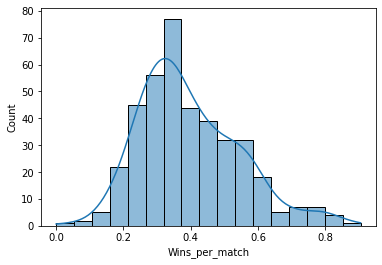

In [22]:
premier['Wins_per_match'] = premier.Wins / premier.Appearances
sns.histplot(premier.Wins_per_match, kde=True)

<AxesSubplot:xlabel='Goals_per_match', ylabel='Count'>

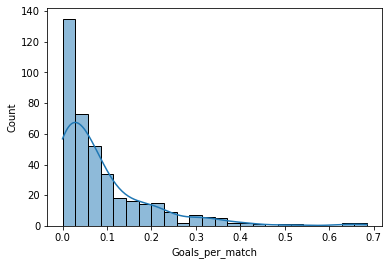

In [23]:
premier['Goals_per_match'] = premier.Goals / premier.Appearances
sns.histplot(premier.Goals_per_match, kde=True)

<AxesSubplot:xlabel='Assists_per_match', ylabel='Count'>

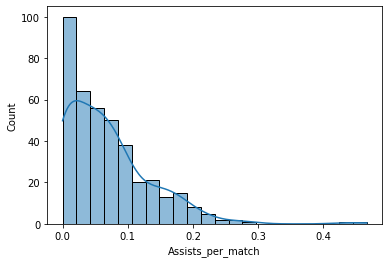

In [24]:
premier['Assists_per_match'] = premier.Assists / premier.Appearances
sns.histplot(premier.Assists_per_match, kde=True)

<AxesSubplot:xlabel='Yellow_per_match', ylabel='Count'>

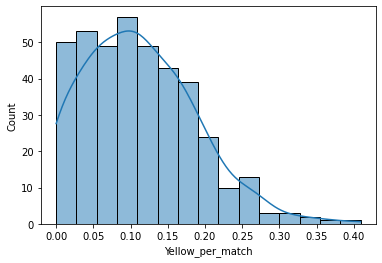

In [25]:
premier['Yellow_per_match'] = premier['Yellow cards'] / premier.Appearances
sns.histplot(premier.Yellow_per_match, kde=True)

<AxesSubplot:xlabel='Red_per_match', ylabel='Count'>

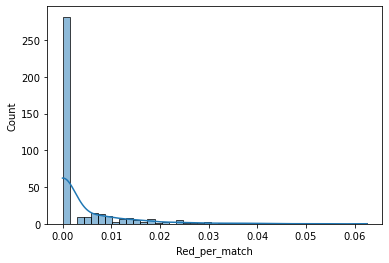

In [26]:
premier['Red_per_match'] = premier['Red cards'] / premier.Appearances
sns.histplot(premier.Red_per_match, kde=True)

<AxesSubplot:xlabel='Fouls_per_match', ylabel='Count'>

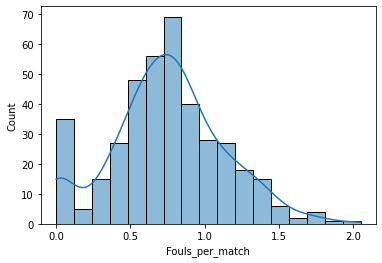

In [27]:
premier['Fouls_per_match'] = premier.Fouls / premier.Appearances
sns.histplot(premier.Fouls_per_match, kde=True)

In [28]:
corrs_variables = premier[['Name', 'Club', 'Position', 'Age', 'Appearances', 'Passes per match', 'Wins_per_match', 'Assists_per_match', 'Yellow_per_match', 'Red_per_match', 'Fouls_per_match', 'Goals_per_match']]

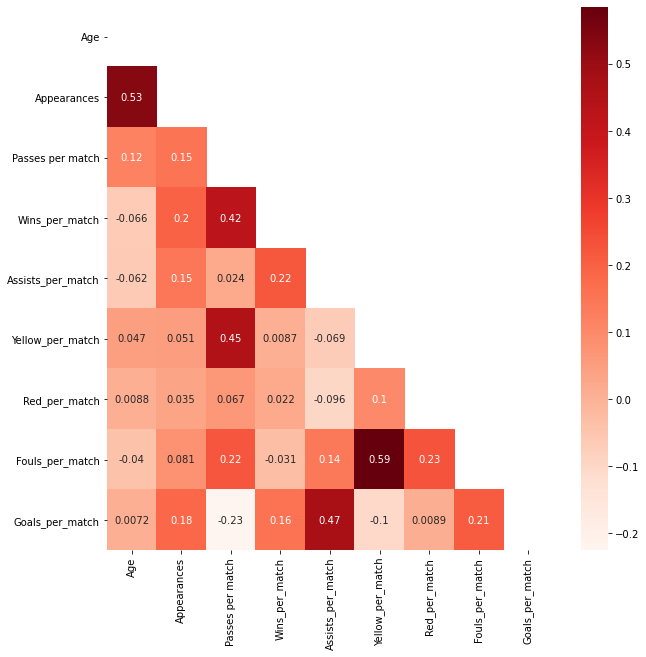

In [29]:
matrix = np.triu(corrs_variables.corr())
plt.figure(figsize=(10,10))
fig = sns.heatmap(corrs_variables.corr(), annot=True, cmap='Reds', mask=matrix)

A continuació, farem un test de correlació entre les variables 'Fouls_per_match' (mitjana de faltes per partit) i 'Yellow_per_match' (mitjana de targetes grogues rebudes per partit).

<AxesSubplot:xlabel='Fouls_per_match', ylabel='Yellow_per_match'>

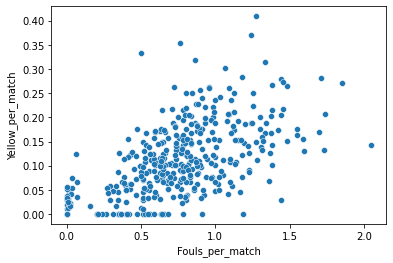

In [30]:
sns.scatterplot(x=premier.Fouls_per_match, y = premier.Yellow_per_match)

<AxesSubplot:xlabel='Yellow_per_match', ylabel='Count'>

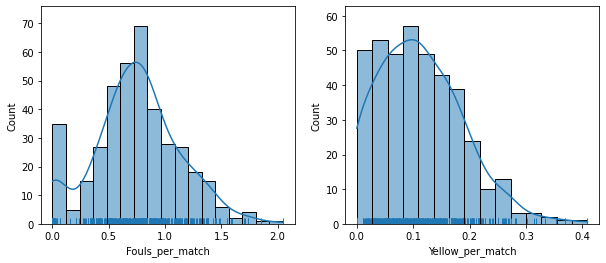

In [31]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

sns.histplot(premier.Fouls_per_match, kde=True, ax=axs[0])
sns.rugplot(premier.Fouls_per_match, ax=axs[0])
sns.histplot(premier.Yellow_per_match, kde=True, ax=axs[1])
sns.rugplot(premier.Yellow_per_match, ax=axs[1])

Abans d'escollir un test paramètric com el de Pearson, veurem si les variables segueixen una distribució normal o no. 

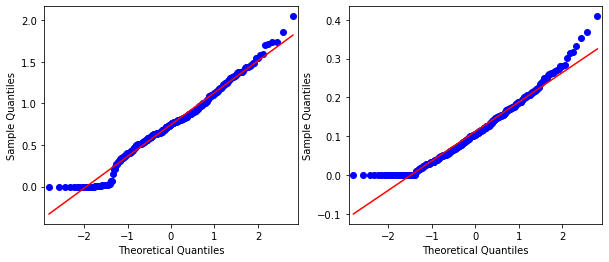

In [32]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

qqplot(premier.Fouls_per_match, line='s', ax = axs[0])
qqplot(premier.Yellow_per_match, line='s', ax = axs[1])

plt.show()

In [33]:
stat, p = stats.shapiro(premier.Fouls_per_match)
print('Statistics=%.3f, p=%.3f' % (stat, p))

stat, p = stats.shapiro(premier.Yellow_per_match)
print('Statistics=%.3f, p=%.3f' % (stat, p))

Statistics=0.981, p=0.000
Statistics=0.963, p=0.000


Sembla que no segueixen cap distribució normal. Per tant, en lloc del test Pearson, farem servir els tests de correlació no paramètrics Spearman i Kendall.

In [34]:
premier.Fouls_per_match.corr(premier.Yellow_per_match, method='spearman')

0.6103253534616767

In [35]:
premier.Fouls_per_match.corr(premier.Yellow_per_match, method='kendall')

0.431665651067847

In [36]:
def result(p):
    alpha = 0.05
    if p > alpha:
        text = ('Samples are uncorrelated (fail to reject H0) p=%.3f' % p)
    else:
        text = ('Samples are correlated (reject H0) p=%.3f' % p)
    return text

r, p = stats.spearmanr(premier.Fouls_per_match, premier.Yellow_per_match)
print(f"Correlación Spearman: r={r}, p-value={p:.43f}")
print(f'{result(p)} \n')


r, p = stats.kendalltau(premier.Fouls_per_match, premier.Yellow_per_match)
print(f"Correlación Kendall: r={r}, p-value={p:.38f}")
print(result(p))

Correlación Spearman: r=0.6103253534616767, p-value=0.0000000000000000000000000000000000000000070
Samples are correlated (reject H0) p=0.000 

Correlación Kendall: r=0.431665651067847, p-value=0.00000000000000000000000000000000000021
Samples are correlated (reject H0) p=0.000


Sembla que podem rebutjar la Hipótesi nul·la i que, per tant, podem asumir un grau de correlació moderat entre 0.43 i 0.64 de les dues variables (faltes per partit i targetes grogues per partit).

---

- Exercici 3
Continua amb el conjunt de dades de tema esportiu que t'agradi i selecciona tres atributs del conjunt de dades. Calcula el p-valor i digues si rebutja la hipòtesi nul·la agafant un alfa de 5%.



En aquest exercici analitzarem la correlació entre les variables 'Wins_per_match' i 'Passes per match' en funció de la posició en la que juguen els futbolistes.

In [37]:
goalkeeper = premier[premier['Position'] == 'Goalkeeper']
defender = premier[premier['Position'] == 'Goalkeeper']
mid = premier[premier['Position'] == 'Midfielder']
forward = premier[premier['Position'] == 'Forward']

arr_positions = [goalkeeper, defender, mid, forward]

Abans de fer el test de correlació, investigarem si les variables segueixen una distribució normal o no.

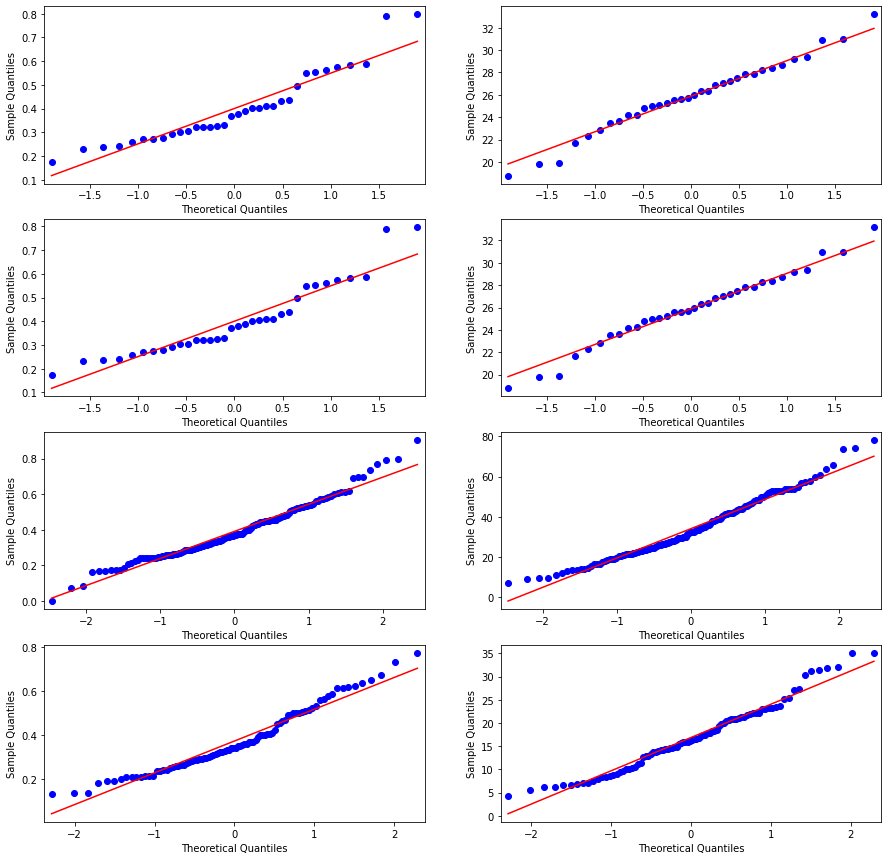

In [38]:
fig, axs = plt.subplots(nrows=4, ncols=2, figsize=(15, 15))

for i in range(0, len(arr_positions)):
    qqplot(arr_positions[i].Wins_per_match, line='s', ax = axs[i, 0])
    qqplot(arr_positions[i]['Passes per match'], line='s', ax = axs[i, 1])

plt.show()

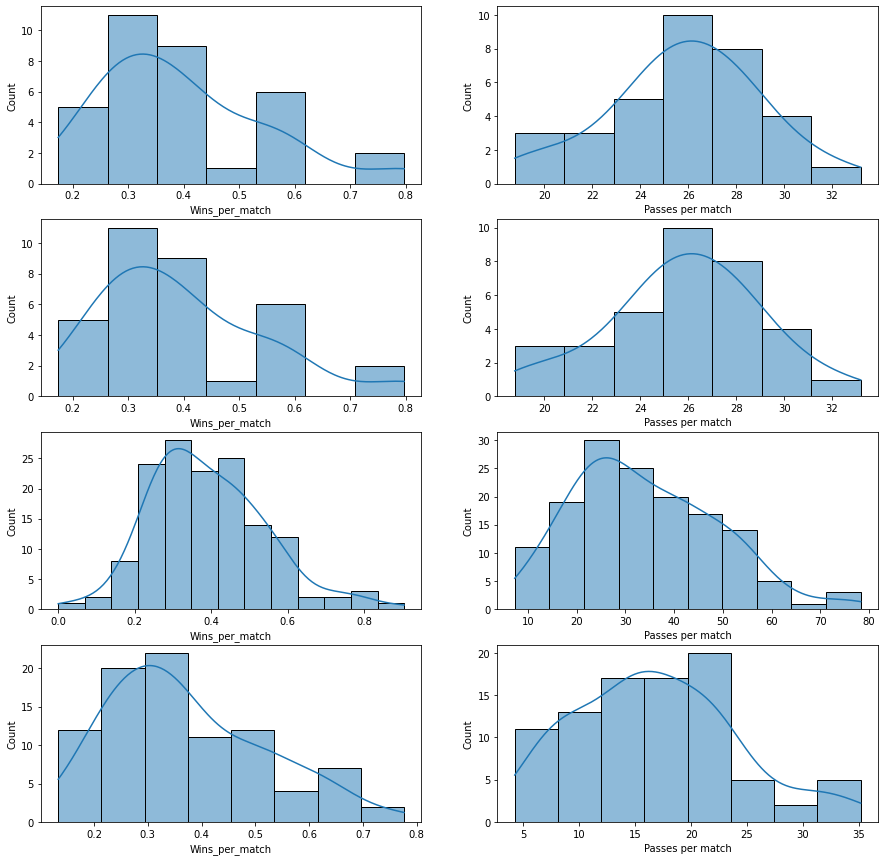

In [56]:
fig, axs = plt.subplots(nrows=4, ncols=2, figsize=(15, 15))

for i in range(0, len(arr_positions)):
    sns.histplot(arr_positions[i].Wins_per_match, kde=True, ax = axs[i, 0])
    sns.histplot(arr_positions[i]['Passes per match'], kde=True, ax = axs[i, 1])
    
plt.show()

In [49]:
def result(p):
    if p > 0.05:
        text = 'Probably Gaussian'
    else:
        text = 'Probably not Gaussian'
    return text

for i in range(0, len(arr_positions)):
    stat, p = stats.shapiro(arr_positions[i].Wins_per_match)
    print(result(p))
    print('Statistics=%.3f, p=%.3f' % (stat, p))
    
    stat, p = stats.shapiro(arr_positions[i]['Passes per match'])
    print(result(p))
    print('Statistics=%.3f, p=%.3f \n' % (stat, p))

Probably not Gaussian
Statistics=0.908, p=0.007
Probably Gaussian
Statistics=0.986, p=0.941 

Probably not Gaussian
Statistics=0.908, p=0.007
Probably Gaussian
Statistics=0.986, p=0.941 

Probably not Gaussian
Statistics=0.975, p=0.008
Probably not Gaussian
Statistics=0.973, p=0.005 

Probably not Gaussian
Statistics=0.954, p=0.003
Probably not Gaussian
Statistics=0.968, p=0.024 



Només dues de les variables presenta una distribució aproximada a una distribució normal, però la majoria no. Per aquest motiu, utilitzarem spearman en lloc de pearson com a test de correlació.

In [41]:
corrs = premier.groupby('Position').Wins_per_match.corr(premier['Passes per match'], method='spearman')
corrs

Position
Defender      0.559127
Forward       0.429543
Goalkeeper   -0.132172
Midfielder    0.381141
Name: Wins_per_match, dtype: float64

<AxesSubplot:xlabel='Position'>

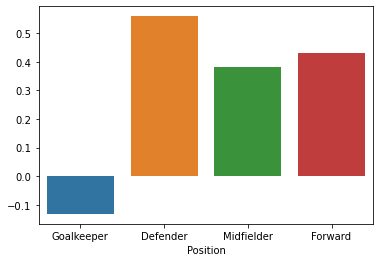

In [42]:
sns.barplot(x=corrs.index, y=corrs.values, order=['Goalkeeper', 'Defender', 'Midfielder', 'Forward'])

In [43]:
pos = [x for x in premier.Position.unique()]
pos

['Goalkeeper', 'Defender', 'Midfielder', 'Forward']

In [44]:
def result(p):
    alpha = 0.05
    if p > alpha:
        text = ('Samples are uncorrelated (fail to reject H0) p=%.3f' % p)
    else:
        text = ('Samples are correlated (reject H0) p=%.3f' % p)
    return text

for i in range(0, len(arr_positions)):
    print(f'{pos[i]}:')
    r, p = stats.spearmanr(arr_positions[i].Wins_per_match, arr_positions[i]['Passes per match'])
    print(f"- Correlación Spearman: r={r}, p-value={p:.7f}")
    print(f'  {result(p)} \n')
    
    r, p = stats.kendalltau(arr_positions[i].Wins_per_match, arr_positions[i]['Passes per match'])
    print(f"- Correlación Kendall: r={r}, p-value={p:.7f}")
    print(f'  {result(p)} \n')

Goalkeeper:
- Correlación Spearman: r=-0.13217205325456294, p-value=0.4561870
  Samples are uncorrelated (fail to reject H0) p=0.456 

- Correlación Kendall: r=-0.09991083368712846, p-value=0.4063918
  Samples are uncorrelated (fail to reject H0) p=0.406 

Defender:
- Correlación Spearman: r=-0.13217205325456294, p-value=0.4561870
  Samples are uncorrelated (fail to reject H0) p=0.456 

- Correlación Kendall: r=-0.09991083368712846, p-value=0.4063918
  Samples are uncorrelated (fail to reject H0) p=0.406 

Midfielder:
- Correlación Spearman: r=0.3811407248186111, p-value=0.0000022
  Samples are correlated (reject H0) p=0.000 

- Correlación Kendall: r=0.26650694349641596, p-value=0.0000020
  Samples are correlated (reject H0) p=0.000 

Forward:
- Correlación Spearman: r=0.4295434071855167, p-value=0.0000239
  Samples are correlated (reject H0) p=0.000 

- Correlación Kendall: r=0.3114061801697035, p-value=0.0000143
  Samples are correlated (reject H0) p=0.000 



En el cas dels futbolistes que juguen de porters i defensors, acceptem la hipòtesi nul·la i, per tant, podem dir que no hi ha cap correlació entre passes i victòries.

En el cas dels migcampistes i els davanters, rebutgem la hipòtesi nul·la i podem acceptar una correlació lleugera entre passes i victòries d'entre 0.27-0.38 (migcampistes) i 0.31-0.43 (davanters).